# Piotr’s Assignment 1: Continuous optimization

## Oscar Martínez Franco

In this assignment we are asked to implement gradient descent optimization method and another proposed method to optimize a given function. We will implement the coordinate wise descent method. This is very similar to gradient descent but instead of doing the gradient of the whole function for a given point we partially derive the function for an specific coordinate (it changes at each iteration) and do an step in the direction of that coordinate. First we will define the function and plot the surfaces for three different $\rho$ (-1,0 and 1).

In [11]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
from sympy import *
from scipy import optimize
import matplotlib.pyplot as plt
import sympy as sp
from time import time

In [6]:
def f(x,A,m):
    mtx_1=np.dot((x-m),A)
    mtx_2=np.dot(mtx_1,np.transpose((x-m)))
    z=0.5*mtx_2-np.sum(np.log(x**2))
    return z

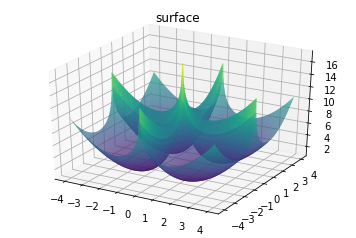

In [33]:
x = np.linspace(-4, 4,300)
y = np.linspace(-4, 4,300)
X, Y = np.meshgrid(x, y)
Z=f_contour(X,Y,0)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

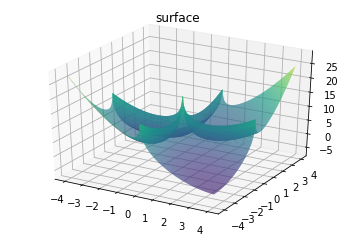

In [34]:
x = np.linspace(-4, 4,300)
y = np.linspace(-4, 4,300)
X, Y = np.meshgrid(x, y)
Z=f_contour(X,Y,1)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

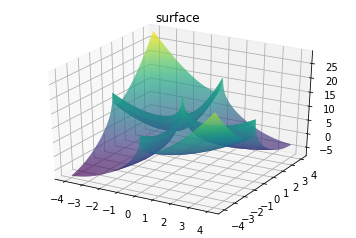

In [35]:
x = np.linspace(-4, 4,300)
y = np.linspace(-4, 4,300)
X, Y = np.meshgrid(x, y)
Z=f_contour(X,Y,-1)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [3]:
def f_contour(x1,x2,ro):
    return 0.5*(x1**2+x2**2+2*ro*x2*x1-ro*x2+0.25)-np.log(x1**2)-np.log(x2**2)

## Testing convergence for different $\rho$

We are told to see the convergence of the gradient descent methods for $\rho$ between -1 and 1. We will count the iterations that it takes for each case to reach the minimum.

In [9]:
x0=np.random.randint(1,6) #we create a random starting point in the positive quadrant 
y0=np.random.randint(1,6) #avoiding 0 to not have problems with the logs

x_next=np.array([x0,y0]) #initial point
m=np.array([0,0.5])
rho_array=np.arange(-1,1.1,step=0.2)
step=0.9
rho=0.8
precision=1e-4 #it will tell when the method is not moving enough and will stop the loop
iter_max=10000
iteration_dict={}
for rho_i in rho_array:
    A=np.array([[1,rho_i],[rho_i,1]])
    iteration=1
    step=0.9
    x_next=np.array([x0,y0])
    distance=1
    while distance>precision and iteration<iter_max:#we stop when the function hasn't moved more than the precision or for iter_max
        x_now=x_next
        gradient=optimize.approx_fprime(x_now, f, step, A, m) #computes the gradient
        x_next=x_next-step*gradient #maskes the step in the direction of the negative gradient
        step=rho**iteration #decreases the step
        z_next=f(x_next,A,m)
        z_now=f(x_now,A,m)
        distance=abs(z_next-z_now) #how the function has incremented
        iteration+=1
    iteration_dict[str(round(rho_i,1))]=iteration
    

In [10]:
iteration_dict

{'-1.0': 39,
 '-0.8': 31,
 '-0.6': 30,
 '-0.4': 29,
 '-0.2': 27,
 '-0.0': 26,
 '0.2': 26,
 '0.4': 28,
 '0.6': 24,
 '0.8': 25,
 '1.0': 42}

## Gradient descent method for R² 

For this method an important part is the decreasing of the stape taken. We have chosen to decrease the step with the following criteria: $$ step=\theta ^{iteration} $$ with $\theta$ a number between (0,1). The higher $\theta$ the lower the step is decreased.

In [86]:
x0=np.random.randint(1,6) #we create a random starting point in the positive quadrant 
y0=np.random.randint(1,6) #avoiding 0 to not have problems with the logs

x_next=np.array([x0,y0]) #initial point
m=np.array([0,0.5])
A=np.array([[1,0.5],[0.5,1]])
step=0.9
rho=0.8
precision=1e-4 #it will tell when the method is not moving enough and will stop the loop
iteration=1
iter_max=10000
distance=1
path_x=[]
path_y=[]

while distance>precision and iteration<iter_max:#we stop when the function hasn't moved more than the precision or for iter_max
    x_now=x_next
    gradient=optimize.approx_fprime(x_now, f, step, A, m) #computes the gradient
    path_x.append(x_now[0])
    path_y.append(x_now[1])
    x_next=x_next-step*gradient #maskes the step in the direction of the negative gradient
    step=rho**iteration #decreases the step
    z_next=f(x_next,A,m)
    z_now=f(x_now,A,m)
    distance=abs(z_next-z_now) #how the function has incremented
    iteration+=1
    print(str(iteration)+' x_now: '+str(x_now)+'; x_next: '+str(x_next)+'; gradient: '+str(gradient))

2 x_now: [2 2]; x_next: [-0.13687289  0.08812711]; gradient: [2.37430321 2.12430321]
3 x_now: [-0.13687289  0.08812711]; x_next: [2.97320264 4.77304386]; gradient: [-3.88759441 -5.85614593]
4 x_now: [2.97320264 4.77304386]; x_next: [-0.11191141  1.13372563]; gradient: [4.82049071 5.68643473]
5 x_now: [-0.11191141  1.13372563]; x_next: [2.20003821 1.45217977]; gradient: [-4.51552661 -0.62198075]
6 x_now: [2.20003821 1.45217977]; x_next: [1.3614838  1.02464739]; gradient: [2.04725199 1.04378024]
7 x_now: [1.3614838  1.02464739]; x_next: [1.20702443 1.13093545]; gradient: [ 0.47137259 -0.32436542]
8 x_now: [1.20702443 1.13093545]; x_next: [1.16662924 1.18991588]; gradient: [ 0.15409542 -0.22499247]
9 x_now: [1.16662924 1.18991588]; x_next: [1.15826105 1.225562  ]; gradient: [ 0.03990259 -0.16997397]
10 x_now: [1.15826105 1.225562  ]; x_next: [1.1595431  1.24919724]; gradient: [-0.00764156 -0.14087701]
11 x_now: [1.1595431  1.24919724]; x_next: [1.16368148 1.26592671]; gradient: [-0.030833

## Coordinate wise descent method for R²

For this method we will use the sympy library, that allows symbolic calculation (i.e. with variables instead of numbers)- This eanbles us to do the partial derivatives in a much easier way.

In [87]:
x_next_1=sp.Matrix([x0,y0]) #initial point

step=0.9
rho=0.8
precision=1e-4
iteration=1
iter_max=10000
distance=1
path_x_1=[]
path_y_1=[]

def f_coordinate_wise(x,A,m): #we define the function using sympy
    log_x=x.applyfunc(sp.log)
    log_x=log_x.as_real_imag()[0]
    z=0.5*(x-m).T*A*(x-m)-2*log_x.T *ones(log_x.T.shape[1], 1)
    return z
x, y = symbols('x y', real=True) #we create the variables x and y
m=sp.Matrix([0,0.5]) #we take A and m from the gradient descent method
A=sp.Matrix([[1,0.5],[0.5,1]])
x_array=sp.Matrix([x,y])
function=f_coordinate_wise(x_array,A,m) #we pass the vector X onto the function

while distance>precision and iteration<iter_max:
    x_now_1=x_next_1[:,:]
    path_x_1.append(float(x_now_1[0]))
    path_y_1.append(float(x_now_1[1]))  
    if iteration%2==0: #for even iterations we derive with respect to x
        function_diff=diff(function,x)
        gradient=function_diff.n(subs={x:float(x_now_1[0]),y:float(x_now_1[1])})#we evaluate the derivative at the current point
        x_next_1[0]=x_next_1[0]-step*gradient[0] #we add to the x coordinate the step times the derivative
    else: #for odd iterations we derive with respect to y
        function_diff=diff(function,y)
        gradient=function_diff.n(subs={x:float(x_now_1[0]),y:float(x_now_1[1])})
        x_next_1[1]=x_next_1[1]-step*gradient[0] 
        
    step=rho**iteration
    z_now_1=function.n(subs={x:float(x_now_1[0]),y:float(x_now_1[1])}) #we do the same criteria as with the gradient descent
    z_next_1=function.n(subs={x:float(x_next_1[0]),y:float(x_next_1[1])})
    distance=abs(float((z_next_1-z_now_1)[0]))
    iteration+=1
    print(str(iteration)+' x_now: '+str(x_now_1)+'; x_next: '+str(x_next_1)+'; gradient: '+str(gradient))


2 x_now: Matrix([[2], [2]]); x_next: Matrix([[2], [0.650000000000000]]); gradient: Matrix([[1.50000000000000]])
3 x_now: Matrix([[2], [0.650000000000000]]); x_next: Matrix([[1.14000000000000], [0.650000000000000]]); gradient: Matrix([[1.07500000000000]])
4 x_now: Matrix([[1.14000000000000], [0.650000000000000]]); x_next: Matrix([[1.14000000000000], [2.15843076923077]]); gradient: Matrix([[-2.35692307692308]])
5 x_now: Matrix([[1.14000000000000], [2.15843076923077]]); x_next: Matrix([[1.03000733711201], [2.15843076923077]]); gradient: Matrix([[0.214829419703105]])
6 x_now: Matrix([[1.03000733711201], [2.15843076923077]]); x_next: Matrix([[1.03000733711201], [1.64772701332072]]); gradient: Matrix([[1.24683534157728]])
7 x_now: Matrix([[1.03000733711201], [1.64772701332072]]); x_next: Matrix([[1.14071825129212], [1.64772701332072]]); gradient: Matrix([[-0.337862897278162]])
8 x_now: Matrix([[1.14071825129212], [1.64772701332072]]); x_next: Matrix([[1.14071825129212], [1.51552966991113]]);

We see that this method has reached an optimal point with less iterations (19) than gradient descent (25). Now we want to plot the paths that have followed both methods to reach the minimums.

/home/oscarmartinez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


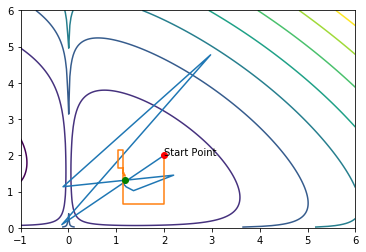

In [88]:
x = np.linspace(-1, 6,300)
y = np.linspace(0, 6,300)
X, Y = np.meshgrid(x, y)
Z=f_contour(X,Y,0.5)
plt.contour(X, Y, Z)
plt.plot(path_x,path_y)
plt.plot(path_x_1,path_y_1)
plt.plot(x0,y0,'ro')
plt.annotate('Start Point',(x0,y0))
plt.plot(x_next[0],x_next[1],'go')

As we can see, for this starting point both have arrived to the same (more or less) minimum, but following quite different paths.

## Gradient descent in n dimensions

Now we have to modify the gradient descent method to admit n dimensions. The changes in this case are minimal

In [12]:
%%time
n=100
x_next_n_first=np.random.randint(low=1,high=10,size=n) #we generate an n coordinate vector
x_next_n=np.copy(x_next_n_first)
A=np.random.rand(n,n)#we generate an n·n random matrix
A=A*A.T#we
m=np.random.randint(low=0,high=1,size=n)
step=0.9
rho=0.8
precision=1e-4
iteration=1
iter_max=10000
distance=1
path_x=[]
path_y=[]

while distance>precision and iteration<iter_max:
    x_now_n=x_next_n
    gradient=optimize.approx_fprime(x_now_n, f, step, A, m)
    x_next_n=x_next_n-step*gradient
    step=rho**iteration
    z_next_n=f(x_next_n,A,m)
    z_now_n=f(x_now_n,A,m)
    distance=abs(z_next_n-z_now_n)
    iteration+=1
    print(str(iteration)+' gradient: '+str(gradient))

2 gradient: [155.55327883 126.26627126 111.92581609 135.90673748 128.21118845
 136.97768266 132.98750777 130.26696294 115.68759517 117.25723095
 119.39823583 119.8116223  114.46543964  92.4729094   89.63793884
 128.94241373 118.47201897 115.71301958 125.06420735 115.0465522
 124.46699317  98.80076907  99.36368239 128.07467273 115.36216574
 116.05198181 107.04253476 123.45964101 103.73332477 107.23207475
 119.21081679 121.95785732 124.29838083 100.58983493 116.17964854
 114.40394122 120.2960316  150.8842931  111.49912136 129.43552129
 132.19667362 101.08045517 111.86868371 100.5041193  112.66595031
 120.45699009 129.13745578 117.94620258 143.69019872 119.21068524
 120.89484881 126.7552131  129.1832296  109.9986224  119.57970042
 109.40013219 112.87982189 105.45122717 123.94849054 107.25742863
 133.63520018 115.98170627  94.69405065 102.39385079 115.41172603
 137.79055628 117.32488596 108.34122292 115.73235879 156.22244947
 128.11704221 115.04338885 128.94994654 142.36914479 137.14931587

64 gradient: [-1.63132612e+07  7.34096753e+07  2.44698918e+07 -6.11747294e+07
  2.44698918e+07  3.26265223e+07 -4.07831529e+06 -6.93313600e+07
 -6.93313600e+07 -6.11747294e+07 -1.22349459e+07  6.93313600e+07
 -8.56446211e+07 -2.03915765e+07 -3.26265223e+07  2.85482070e+07
 -9.38012517e+07 -6.11747294e+07 -9.38012517e+07 -6.93313600e+07
 -3.67048376e+07 -3.67048376e+07  2.85482070e+07  4.07831529e+06
 -3.67048376e+07 -2.03915765e+07 -1.22349459e+07  1.22349459e+07
 -4.07831529e+06  4.07831529e+06 -2.03915765e+07 -4.48614682e+07
 -6.93313600e+07 -3.26265223e+07  0.00000000e+00  2.03915765e+07
 -3.67048376e+07 -9.78795670e+07 -1.18271143e+08  3.67048376e+07
 -6.93313600e+07 -6.11747294e+07 -1.22349459e+07 -3.67048376e+07
 -8.15663058e+06  4.48614682e+07 -2.44698918e+07 -4.48614682e+07
  1.18271143e+08  4.07831529e+06  2.44698918e+07 -2.85482070e+07
  7.34096753e+07 -8.15663058e+06 -2.03915765e+07 -6.93313600e+07
 -2.85482070e+07  2.03915765e+07 -5.30180988e+07  6.11747294e+07
 -4.07831529

We see that it has taken a larger amount of iterations for 100 dimensions (87) but it has been really fast (just 640ms)

## Coordinate wise descent method for n dimensions 

In [94]:
%%time
n=100
from sympy.matrices import randMatrix
def f_coordinate_wise(x,A,m):
    log_x=x.applyfunc(sp.log)
    log_x=log_x.as_real_imag()[0]
    z=0.5*(x-m).T*A*(x-m)-2*log_x.T *ones(log_x.T.shape[1], 1)
    return z

stri=''
x_next_n_cd=sp.ones(n,1)
for i in range(n):
    x_next_n_cd[i]=x_next_n_first[i]
    stri=stri+'x'+str(i)+' ' #we create all the variables as x0,x1,x2 etc

a = symbols(stri, real=True)
x_array_n_cd=sp.Matrix(a)
A=sp.Matrix(A) #we take A, the starting point and m the same as for the gradient descent
m=sp.Matrix(m)
step=1
rho=0.8
precision=1e-4
iteration=1
iter_max=10000
distance=1
function=f_coordinate_wise(x_array_n_cd,A,m)
var_cnt=0
distance_arr=np.zeros(n)

while distance>precision and iteration<iter_max:
    x_now_n_cd=x_next_n_cd[:,:] #we do a copy of the vector to not modify its value
    function_diff=diff(function,a[var_cnt])
    var_dic=dict(zip(a,x_now_n_cd))
    gradient=function_diff.n(subs=var_dic)
    x_next_n_cd[var_cnt]=x_next_n_cd[var_cnt]-step*gradient[0] 
    step=rho**iteration
    
    function_now_eval=function.n(subs=var_dic)#we substitute the value of the derivative in the actual point for all the variables
    next_var_dic=dict(zip(a,x_next_n_cd)) #we have to evaluate the function at the next point, so we create the dictionary of variables to evaluate the function
    function_next_eval=function.n(subs=next_var_dic)
    distance=abs(float((function_next_eval-function_now_eval)[0])) #we compute how much we have moved in this iteration
    iteration+=1
    var_cnt+=1
    if var_cnt==n:
        var_cnt=0
    else:
        pass
    print(str(iteration))
        

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


KeyboardInterrupt: 

We see that for the coordinate wise gradient descent it takes less iterations (72) than for the simple gradient descent (87) but it's a really slow process (5min 22s) which is more than 500 times slower!!. Therefore we see that coordinate wise descent scales worse than gradient descent with n but converges faster.

## How do the algorithms scale with n? 

In [42]:
np.arange(200,410,100)

array([200, 300, 400])

In [49]:
#GRADIENT DESCENT
step=0.9
rho=0.8
precision=1e-4
iteration=1
iter_max=10000
iteration_n_dic_gd={}
n_array=np.arange(10,110,step=10)
A_list=[]
m_list=[]
x_first_list=[]
for n in n_array:
    toc=time()
    distance=1
    step=0.9
    rho=0.8
    iteration=1
    x_next_n_first=np.random.randint(low=1,high=10,size=n) #we generate an n coordinate vector
    x_first_list.append(x_next_n_first)
    x_next_n=np.copy(x_next_n_first)
    A=np.random.rand(n,n)#we generate an n·n random matrix
    A=A*A.T
    A_list.append(A)
    m=np.random.randint(low=0,high=1,size=n)
    m_list.append(m)
    while distance>precision and iteration<iter_max:
        x_now_n=x_next_n
        gradient=optimize.approx_fprime(x_now_n, f, step, A, m)
        x_next_n=x_next_n-step*gradient
        step=rho**iteration
        z_next_n=f(x_next_n,A,m)
        z_now_n=f(x_now_n,A,m)
        distance=abs(z_next_n-z_now_n)
        iteration+=1
    tic=time()
    iteration_n_dic_gd[str(n)+' dimensions time']=round(tic-toc,2)
    iteration_n_dic_gd[str(n)+' dimensions iterations']=iteration

In [50]:
iteration_n_dic_gd

{'10 dimensions time': 0.03,
 '10 dimensions iterations': 80,
 '20 dimensions time': 0.04,
 '20 dimensions iterations': 116,
 '30 dimensions time': 0.06,
 '30 dimensions iterations': 125,
 '40 dimensions time': 0.08,
 '40 dimensions iterations': 126,
 '50 dimensions time': 0.1,
 '50 dimensions iterations': 131,
 '60 dimensions time': 0.12,
 '60 dimensions iterations': 121,
 '70 dimensions time': 0.15,
 '70 dimensions iterations': 111,
 '80 dimensions time': 0.2,
 '80 dimensions iterations': 123,
 '90 dimensions time': 0.19,
 '90 dimensions iterations': 100,
 '100 dimensions time': 0.18,
 '100 dimensions iterations': 85}

In [39]:
from sympy.matrices import randMatrix

def f_coordinate_wise(x,A,m):
    log_x=x.applyfunc(sp.log)
    log_x=log_x.as_real_imag()[0]
    z=0.5*(x-m).T*A*(x-m)-2*log_x.T *ones(log_x.T.shape[1], 1)
    return z
iteration_n_dic_cd={}
n_array=np.arange(10,110,step=10)

for i in range(len(n_array)):
    stri=''
    n=n_array[i]
    
    for j in range(n):
        stri=stri+'x'+str(j)+' ' #we create all the variables as x0,x1,x2 etc
   
    x_next_n_cd=sp.Matrix(x_first_list[i])
    a = symbols(stri, real=True)
    x_array_n_cd=sp.Matrix(a)
    A=sp.Matrix(A_list[i]) #we take A, the starting point and m the same as for the gradient descent
    m=sp.Matrix(m_list[i])
    step=1
    rho=0.8
    precision=1e-4
    iteration=1
    iter_max=10000
    distance=1
    function=f_coordinate_wise(x_array_n_cd,A,m)
    var_cnt=0
    distance_arr=np.zeros(n)
    toc=time()
    while distance>precision and iteration<iter_max:
        x_now_n_cd=x_next_n_cd[:,:] #we do a copy of the vector to not modify its value
        function_diff=diff(function,a[var_cnt])
        var_dic=dict(zip(a,x_now_n_cd))
        gradient=function_diff.n(subs=var_dic)
        x_next_n_cd[var_cnt]=x_next_n_cd[var_cnt]-step*gradient[0] 
        step=rho**iteration
    
        function_now_eval=function.n(subs=var_dic)#we substitute the value of the derivative in the actual point for all the variables
        next_var_dic=dict(zip(a,x_next_n_cd)) #we have to evaluate the function at the next point, so we create the dictionary of variables to evaluate the function
        function_next_eval=function.n(subs=next_var_dic)
        distance=abs(float((function_next_eval-function_now_eval)[0])) #we compute how much we have moved in this iteration
        iteration+=1
        var_cnt+=1
        if var_cnt==n:
            var_cnt=0
        else:
            pass
    tic=time()
    iteration_n_dic_cd[str(n)+' dimensions time']=round(tic-toc,2)
    iteration_n_dic_cd[str(n)+' dimensions iterations']=iteration

In [40]:
iteration_n_dic_cd

{'10 dimensions time': 1.95,
 '10 dimensions iterations': 33,
 '20 dimensions time': 6.12,
 '20 dimensions iterations': 32,
 '30 dimensions time': 23.73,
 '30 dimensions iterations': 58,
 '40 dimensions time': 31.27,
 '40 dimensions iterations': 43,
 '50 dimensions time': 55.38,
 '50 dimensions iterations': 49,
 '60 dimensions time': 92.82,
 '60 dimensions iterations': 58,
 '70 dimensions time': 136.31,
 '70 dimensions iterations': 62,
 '80 dimensions time': 174.1,
 '80 dimensions iterations': 62,
 '90 dimensions time': 214.54,
 '90 dimensions iterations': 59,
 '100 dimensions time': 185.08,
 '100 dimensions iterations': 41}